# SMOS/in-situ data comparison
A first approach to in-situ data and SSS satellite observations


by Cristina Martí Solana 

Import libraries

In [1]:
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
import pandas as pd
import cmocean
from datetime import timedelta
from mpl_toolkits.basemap import Basemap
from functools import partial
from scipy.interpolate import RegularGridInterpolator

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

### Initial settings

Input and output paths

In [2]:
# inputs
pathSMOS = '../data/SSS_data/SMOS_L3_DEBIAS_LOCEAN_v8/debiasedSSS_09days_v8/*.nc'
pathTSG = '../data/insitu_data/TSG.csv'
pathVEL = '../data/velocity_data/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1724159251349.nc'

# outputs
pathSMOSInterpolation = "../outputs/SMOS_interpolation/"

Define domain limits and import data. The data consists on:
- SMOS SSS L3 maps generated by CATDS CEC LOCEAN (9-day average)
- Thermosal data from cruise expedition used in Manta et al.,2022 article
- Velocity fields from cmems

In [3]:
# time, longitude and latitude limits
time_lim = ["2016-04-08", "2016-05-12"]
lon_lim = [-57,-49]
lat_lim = [-40,-33]

# SMOS SSS L3 maps generated by CATDS CEC LOCEAN (9 days)
dsSMOS = xr.open_mfdataset(pathSMOS)
dsSMOS = dsSMOS.sel(time=slice(time_lim[0],time_lim[1]),lon=slice(lon_lim[0],lon_lim[1]),lat=slice(lat_lim[0],lat_lim[1]))

# TSG
dsTSG = pd.read_csv(pathTSG)

# velocity fields
dsVEL = xr.open_dataset(pathVEL)
dsVEL = dsVEL.sel(time=slice(time_lim[0],time_lim[1]),longitude=slice(lon_lim[0],lon_lim[1]),latitude=slice(lat_lim[0],lat_lim[1]))

Definition of functions needed

In [4]:
def interpolation(ds_SMOS,ds_TSG,variable):
    """Linear interpolation of the SMOS SSS in the in-situ data transect"""
    interp = RegularGridInterpolator((ds_SMOS["lat"].values,ds_SMOS["lon"].values),ds_SMOS["SSS"].values)
    X,Y = np.meshgrid(ds_TSG["latitude"].values,ds_TSG["longitude"].values, indexing='ij')
    return interp((ds_TSG["latitude"].values,ds_TSG["longitude"].values))

def plot_insitu(ds_TSG,ax,variable,cmap,normalizer):
    """Plot in-situ data. Scatter with cmap of salinity"""
    ax.scatter(ds_TSG["longitude"],ds_TSG["latitude"],s=24,c='w')
    plot = ax.scatter(ds_TSG["longitude"],ds_TSG["latitude"],c=ds_TSG[variable],cmap=cmap,norm=normalizer,s=20,label="")
    return plot

def plot_SSS(day,variable,lon_variable,lat_variable,ax,cmap,normalizer):
    """Plot SMOS SSS map selected by time"""
    ax.set_title(str(day["time"])[36:46])
    plot = ax.pcolor(day[lon_variable],day[lat_variable],day[variable],cmap=cmap,norm=normalizer)
    return plot

def plot_velocity(ds_velocity,ax):
    """Plot velocity vector field"""
    ax.quiver(ds_velocity["longitude"].values,ds_velocity["latitude"].values,ds_velocity["ugos"].values,ds_velocity["vgos"].values,color='grey', scale=15, alpha=0.8)

def map_plot(map,lon_lim,lat_lim,ax):
    """Decorations for plotting geopositional data"""
    #map.drawcoastlines(ax=ax)
    #map.drawrivers(ax=ax)
    map.fillcontinents(color='0.8', lake_color='0.8',ax=ax)
    parallels = np.arange(lat_lim[0]+1,lat_lim[1],2)
    meridians = np.arange(lon_lim[0]+1,lon_lim[1],2)
    map.drawparallels(parallels,labels=[1,0,0,0],fontsize=6, linewidth=0.1, ax=ax)
    map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=6, linewidth=0.1, ax=ax)
    # ax.spines[:].set_visible(False)

In [5]:
# Create map of the described domain
map = Basemap(resolution='i',area_thresh=10,llcrnrlon=lon_lim[0],llcrnrlat=lat_lim[0],urcrnrlon=lon_lim[1],urcrnrlat=lat_lim[1])

# normalizer and colormap selection
normalizer=Normalize(31,37)
im=cm.ScalarMappable(norm=normalizer)
cmap = cm.jet

### Preprocessing data

For an easier data management is useful to express the temporal dimension of SMOS and insitu datasets with the same dtype.

In [6]:
# extract SMOS and TSG time dimension
timeSMOS = np.array(dsSMOS.time.values,dtype="datetime64[s]")
timeTSG = [np.array(dsTSG.date.values[i],dtype="datetime64[s]") for i in range(len(dsTSG))]
dsTSG.date = timeTSG

### Plot TSG data superimposed to SMOS maps


file for sss created, ...  ../../outputs/SMOS_interpolation/20160410_SMOS_int_insitu.nc

file for sss created, ...  ../../outputs/SMOS_interpolation/20160414_SMOS_int_insitu.nc

file for sss created, ...  ../../outputs/SMOS_interpolation/20160418_SMOS_int_insitu.nc

file for sss created, ...  ../../outputs/SMOS_interpolation/20160422_SMOS_int_insitu.nc

file for sss created, ...  ../../outputs/SMOS_interpolation/20160426_SMOS_int_insitu.nc

file for sss created, ...  ../../outputs/SMOS_interpolation/20160430_SMOS_int_insitu.nc

file for sss created, ...  ../../outputs/SMOS_interpolation/20160504_SMOS_int_insitu.nc

file for sss created, ...  ../../outputs/SMOS_interpolation/20160508_SMOS_int_insitu.nc

file for sss created, ...  ../../outputs/SMOS_interpolation/20160512_SMOS_int_insitu.nc


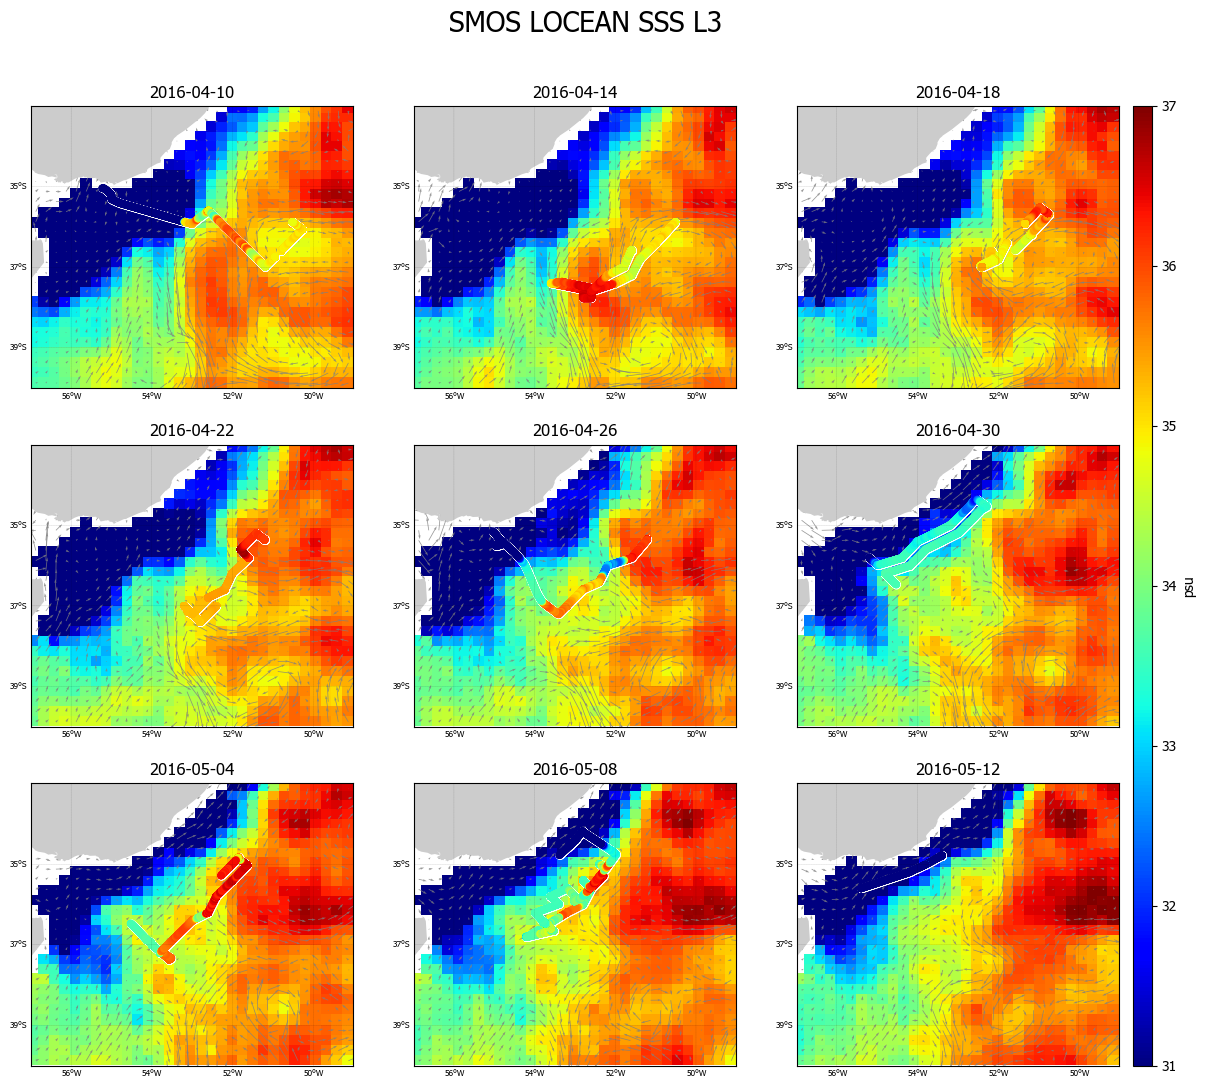

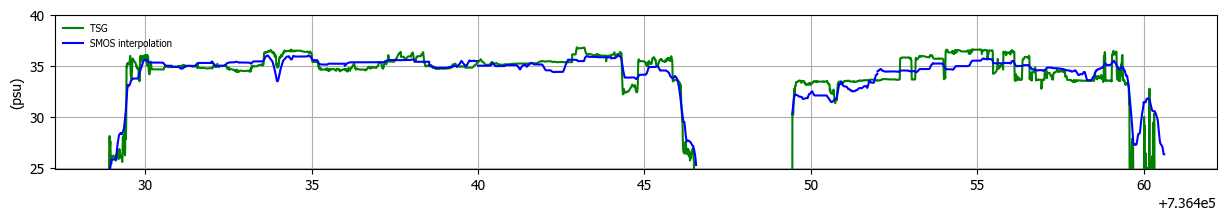

In [7]:
# --------------------------------------------------------------------------------------------------

fig1,ax1 = plt.subplots(3,3,figsize=(15,12),sharex=True,sharey=True)
fig1.suptitle('SMOS LOCEAN SSS L3',fontsize="20")

fig2,ax2 = plt.subplots(1,figsize=(15,2))
# ax2.set_xticks([dsTSG["dates"][int(i)] for i in np.linspace(0,len(dsTSG["dates"])-1,9)])
# ax2.set_xticklabels([dsTSG["date"][int(i)][:10] for i in np.linspace(2500,len(dsTSG["dates"])-2500,9)])
ax2.set_ylim(24.9,40)
ax2.set_ylabel("(psu)")
# ax2.spines[:].set_visible(False)
ax2.grid()

# --------------------------------------------------------------------------------------------------

i = 0
for date in timeSMOS:
    date_obj = date.item()
    dsSMOS_date = dsSMOS.sel(time=date)
    dsVEL_date = dsVEL.sel(time=date)
    dsTSG_date = dsTSG[(dsTSG.date > date-np.timedelta64(2,"D")) & (dsTSG.date < date+np.timedelta64(2,"D"))]
    
    interpSSS = interpolation(dsSMOS_date,dsTSG_date,"SSS")

    name_file = pathSMOSInterpolation + str(date)[:4] + str(date)[5:7] + str(date)[8:10] + "_SMOS_int_insitu.nc"
    
    print("")
    print("file for sss created, ... ", name_file)

    # Create variable
    ds = xr.Dataset(
        data_vars = dict(
            sss = (["time"],interpSSS)
        ),
        coords = dict(
            lon = (["time"],dsTSG_date.longitude),
            lat = (["time"],dsTSG_date.latitude),
            time = (dsTSG_date.dates)
        )
    )
    ds.to_netcdf(name_file)

    # --------------------------------------------------------------------------------------------------

    if i < 3:
        plot = plot_SSS(dsSMOS_date,"SSS","lon","lat",ax1[0,i],cmap,normalizer)
        plot_velocity(dsVEL_date,ax1[0,i])
        plot_insitu(dsTSG_date,ax1[0,i],"salinity_psu",cmap,normalizer)
        map_plot(map,lon_lim,lat_lim,ax1[0,i])
    elif i < 6:
        plot = plot_SSS(dsSMOS_date,"SSS","lon","lat",ax1[1,i-3],cmap,normalizer)
        plot_velocity(dsVEL_date,ax1[1,i-3])
        plot_insitu(dsTSG_date,ax1[1,i-3],"salinity_psu",cmap,normalizer)
        map_plot(map,lon_lim,lat_lim,ax1[1,i-3])
    else:
        plot = plot_SSS(dsSMOS_date,"SSS","lon","lat",ax1[2,i-6],cmap,normalizer)
        plot_velocity(dsVEL_date,ax1[2,i-6])
        plot_insitu(dsTSG_date,ax1[2,i-6],"salinity_psu",cmap,normalizer)
        map_plot(map,lon_lim,lat_lim,ax1[2,i-6])

    ax2.plot(dsTSG_date.dates,dsTSG_date.salinity_psu,color="g",label="")
    ax2.plot(dsTSG_date.dates,interpSSS,color="b",label="")
    i += 1
  
fig1.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=1,wspace=0.04, hspace=0.2)
fig1.colorbar(plot,ax=ax1,label='psu',pad=0.01,aspect=50)
# fig1.savefig('../../plots/SMOS_LOCEAN_L3.pdf',format='pdf',dpi=500,bbox_inches='tight',pad_inches = 0.1)

ax2.legend(['TSG','SMOS interpolation'],loc='upper left',fontsize=7,frameon=False)
# fig2.savefig('../../plots/SSS comparison.pdf',format='pdf',dpi=500,bbox_inches='tight',pad_inches = 0.1)

plt.show()
# --------------------------------------------------------------------------------------------------